# Personalización de las leyendas de las gráficas

Las leyendas de la gráfica dan significado a una visualización, asignando significado a los distintos elementos de la gráfica.
Anteriormente vimos cómo crear una leyenda sencilla; Aquí veremos cómo personalizar la ubicación y la estética de la leyenda en Matplotlib.

La leyenda más simple se puede crear con el comando ``plt.legend()``, que crea automáticamente una leyenda para cualquier elemento de la gráfica etiquetado:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

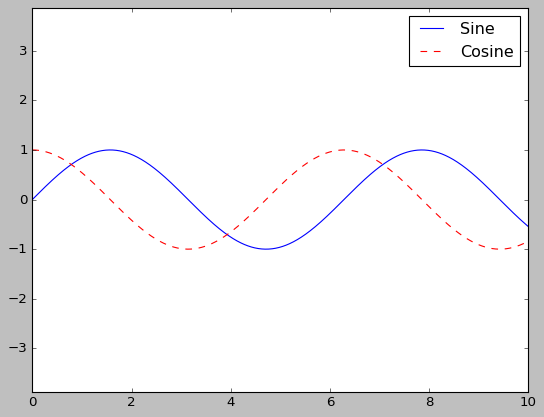

In [8]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal') # Misma escala en x e y
ax.legend();

Pero hay muchas formas en las que podríamos querer personalizar dicha leyenda.
Por ejemplo, podemos especificar la ubicación y desactivar el marco:

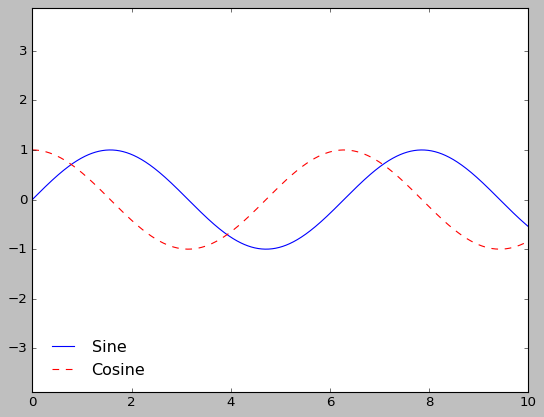

In [11]:
ax.legend(loc = 'lower left', frameon = False)
fig

Podemos usar el comando ``ncol`` para especificar el número de columnas en la leyenda:

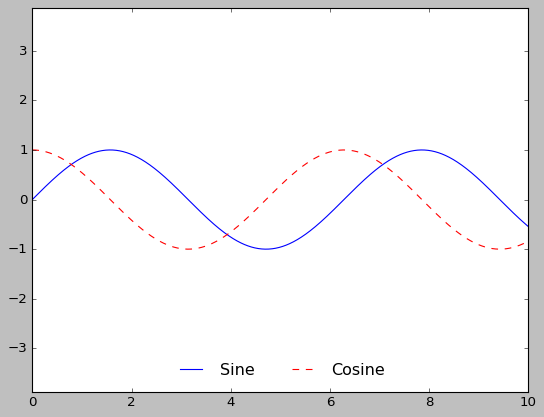

In [14]:
ax.legend(loc = 'lower center', frameon = False, ncol = 2)
fig

Podemos usar un cuadro redondeado (``fancybox``) o agregar una sombra, cambiar la transparencia (valor *alpha*) del marco o cambiar el relleno alrededor del texto:

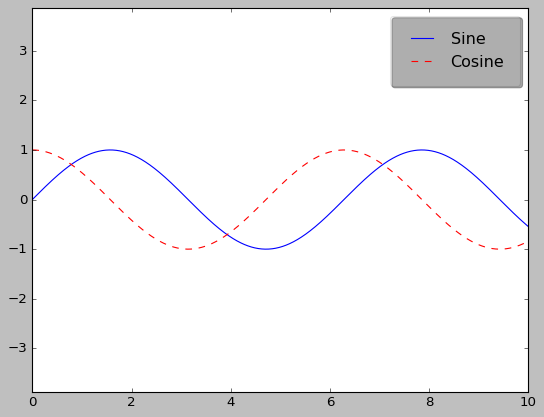

In [21]:
ax.legend(fancybox=True, framealpha=0.1, shadow=True, borderpad=1)
fig

Para obtener más información sobre las opciones de leyenda disponibles, consulte la documentación ``plt.legend``.

## Elegir elementos para la leyenda

Como ya hemos visto, la leyenda incluye por defecto todos los elementos etiquetados.
Si esto no es lo que deseamos, podemos ajustar qué elementos y etiquetas aparecen en la leyenda utilizando los objetos devueltos por los comandos de la gráfica.
El comando ``plt.plot()`` puede crear varias líneas a la vez y devuelve una lista de instancias de líneas creadas.
Pasar cualquiera de estos a ``plt.legend()`` le indicará cuál identificar, junto con las etiquetas que nos gustaría especificar:

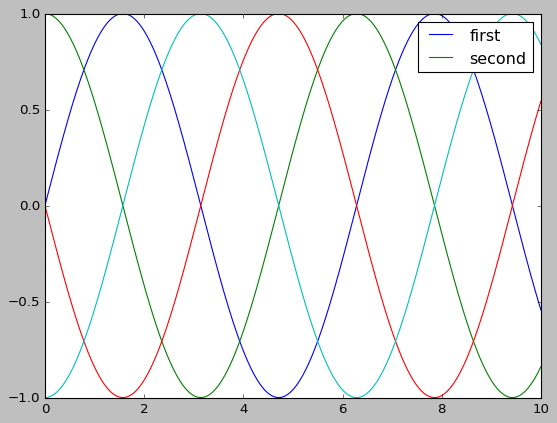

In [22]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines es una lista de una instancia plt.Line2D
plt.legend(lines[:2], ['first', 'second']);

En la práctica, generalmente verá que es más claro usar el primer método, aplicando etiquetas a los elementos de la gráfica que le gustaría mostrar en la leyenda:

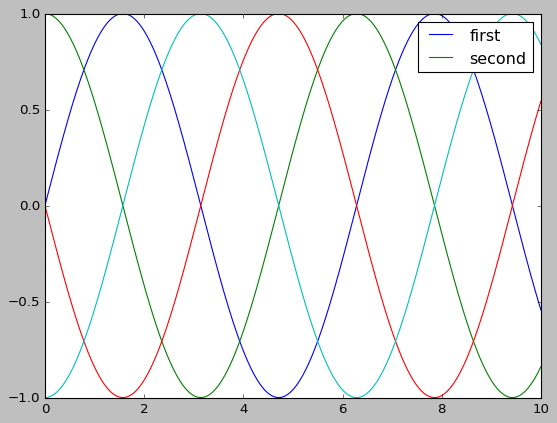

In [23]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

Observe que, de forma predeterminada, la leyenda ignora todos los elementos sin un conjunto de atributos ``label``.

## Leyenda del tamaño de los puntos

A veces, los valores predeterminados de la leyenda no son suficientes para la visualización dada.
Por ejemplo, quizás esté utilizando el tamaño de los puntos para marcar ciertas características de los datos y desee crear una leyenda que refleje esto.
A continuación se muestra un ejemplo en el que usaremos el tamaño de los puntos para indicar las poblaciones de ciudades de California.
Nos gustaría una leyenda que especifique la escala de los tamaños de los puntos, y lo lograremos trazando algunos datos etiquetados sin entradas:

In [24]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


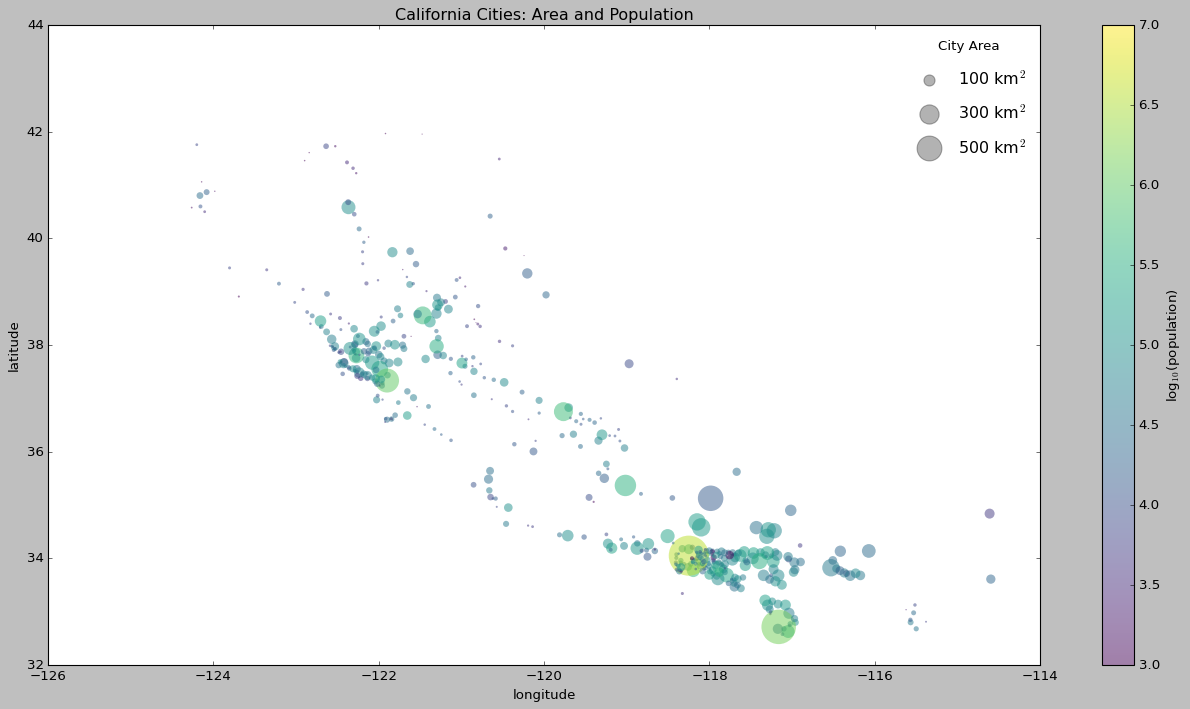

In [41]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extraer los datos que nos interesan
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

plt.figure(figsize=(20,10))
# Dispersion de puntos, usando tamaño y color pero sin etiqueta
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Aquí creamos la leyenda:
# visualizaremos listas vacías con el tamaño y la etiqueta deseados
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

La leyenda siempre hará referencia a algún objeto que esté en el gráfico, por lo que si queremos mostrar una forma particular debemos dibujarla.
En este caso, los objetos que queremos (círculos grises) no están en el gráfico, por lo que **los falsificamos trazando listas vacías.**
Observe también que la leyenda solo enumera los elementos de la trama que tienen una etiqueta especificada.

Al trazar listas vacías, creamos objetos de la gráfica etiquetados que son recogidos por la leyenda, y ahora nuestra leyenda nos brinda información útil.
**Esta estrategia puede resultar útil para crear visualizaciones más sofisticadas.**

Finalmente, tenga en cuenta que para **datos geográficos como este, sería más claro si pudiéramos mostrar los límites estatales** u otros elementos específicos del mapa.
Para esto, una excelente opción de herramienta es el kit de herramientas complementario Basemap de Matplotlib.

## Múltiples leyendas

A veces, al diseñar un gráfico, le gustaría agregar varias leyendas a los mismos ejes.
Desafortunadamente, Matplotlib no lo pone fácil: a través de la interfaz estándar ``legend``, sólo es posible crear una única leyenda para toda la gráfica.
**Si intentas crear una segunda leyenda usando ``plt.legend()`` o ``ax.legend()``, simplemente anulará la primera.**
Podemos solucionar esto creando una nueva leyenda desde cero y luego usando el método de nivel inferior ``ax.add_artist()`` para agregar manualmente la segunda leyenda a la gráfica:

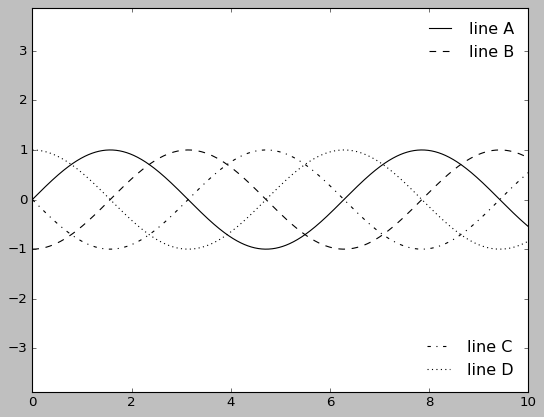

In [40]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# Identifica las lineas y las etiquetas de la primera leyenda
#ax.legend(lines[:2], ['line A', 'line B'],
#          loc='upper right', frameon=False)

# Crea la segunda leyenda y la añade manualmente
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
leg1 = Legend(ax, lines[:2], ['line A', 'line B'],
             loc='upper right', frameon=False)
ax.add_artist(leg);
ax.add_artist(leg1);

Este es un vistazo a los objetos de bajo nivel que componen cualquier gráfico de Matplotlib.
Si examina el código fuente de ``ax.legend()`` (recuerde que puede hacer esto dentro del cuaderno IPython usando ``ax.legend??``) verá que la función simplemente consta de alguna lógica para crear un ``Legend`` adecuado, que luego se guarda en el atributo ``legend_`` y se agrega a la figura cuando se dibuja la gráfica.

# Personalizando la barra de colores

**Las leyendas del gráfico identifican etiquetas discretas de puntos discretos.
Para etiquetas continuas basadas en el color de puntos, líneas o regiones, una barra de colores etiquetada puede ser una excelente herramienta.**
En Matplotlib, una barra de colores son ejes separados que pueden proporcionar una clave para el significado de los colores en un gráfico.
Comenzaremos configurando el notebook para dibujar e importar las funciones que usaremos:

In [34]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [35]:
%matplotlib inline
import numpy as np

Como hemos visto varias veces a lo largo de esta sección, la barra de colores más simple se puede crear con la función ``plt.colorbar``:

In [43]:
print(x[:, np.newaxis])
print(x)

[[ 0.        ]
 [ 0.01001001]
 [ 0.02002002]
 [ 0.03003003]
 [ 0.04004004]
 [ 0.05005005]
 [ 0.06006006]
 [ 0.07007007]
 [ 0.08008008]
 [ 0.09009009]
 [ 0.1001001 ]
 [ 0.11011011]
 [ 0.12012012]
 [ 0.13013013]
 [ 0.14014014]
 [ 0.15015015]
 [ 0.16016016]
 [ 0.17017017]
 [ 0.18018018]
 [ 0.19019019]
 [ 0.2002002 ]
 [ 0.21021021]
 [ 0.22022022]
 [ 0.23023023]
 [ 0.24024024]
 [ 0.25025025]
 [ 0.26026026]
 [ 0.27027027]
 [ 0.28028028]
 [ 0.29029029]
 [ 0.3003003 ]
 [ 0.31031031]
 [ 0.32032032]
 [ 0.33033033]
 [ 0.34034034]
 [ 0.35035035]
 [ 0.36036036]
 [ 0.37037037]
 [ 0.38038038]
 [ 0.39039039]
 [ 0.4004004 ]
 [ 0.41041041]
 [ 0.42042042]
 [ 0.43043043]
 [ 0.44044044]
 [ 0.45045045]
 [ 0.46046046]
 [ 0.47047047]
 [ 0.48048048]
 [ 0.49049049]
 [ 0.5005005 ]
 [ 0.51051051]
 [ 0.52052052]
 [ 0.53053053]
 [ 0.54054054]
 [ 0.55055055]
 [ 0.56056056]
 [ 0.57057057]
 [ 0.58058058]
 [ 0.59059059]
 [ 0.6006006 ]
 [ 0.61061061]
 [ 0.62062062]
 [ 0.63063063]
 [ 0.64064064]
 [ 0.65065065]
 [ 0.66066

[[ 0.          0.01000984  0.02001868 ... -0.52711499 -0.53559488
  -0.54402111]
 [ 0.          0.01000934  0.02001768 ... -0.52708858 -0.53556805
  -0.54399386]
 [ 0.          0.01000784  0.02001467 ... -0.52700936 -0.53548755
  -0.54391209]
 ...
 [-0.         -0.0085063  -0.01701176 ...  0.44793914  0.4551453
   0.46230586]
 [-0.         -0.00845306 -0.01690528 ...  0.44513546  0.45229652
   0.45941226]
 [-0.         -0.00839897 -0.01679711 ...  0.44228718  0.44940242
   0.45647263]]


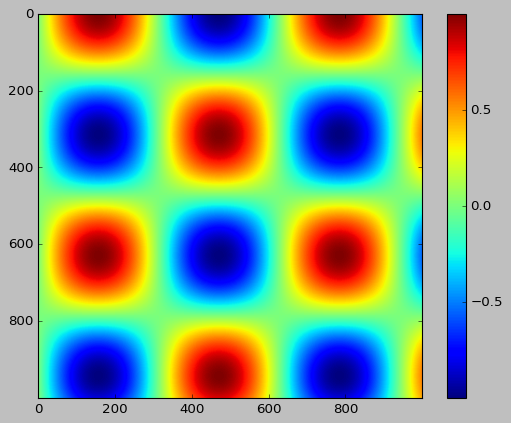

In [66]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
print(I)
plt.imshow(I)
plt.colorbar();

Ahora discutiremos algunas ideas para personalizar estas barras de colores y usarlas de manera efectiva en diversas situaciones.

## Personalización de las barras de colores

El mapa de colores se puede especificar usando el argumento ``cmap`` de la función de la gráfica que crea la visualización:

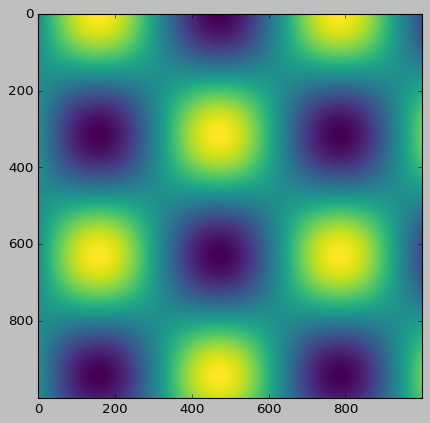

In [47]:
plt.imshow(I, cmap = 'viridis');

Todos los mapas de colores disponibles están en el espacio de nombres ``plt.cm``; El uso de la función de tabulación de IPython le brindará una lista completa de posibilidades integradas:
```
plt.cm.<TAB>
```
Pero ser *capaz* de elegir un mapa de colores es sólo el primer paso: ¡lo más importante es cómo *decidir* entre las posibilidades!
La elección resulta mucho más sutil de lo que cabría esperar inicialmente.

### Eligiendo el mapa de colores

Un tratamiento completo de la elección del color dentro de la visualización está más allá del alcance de este notebook, pero para una lectura entretenida sobre este tema y otros, consulte el artículo ["Diez reglas simples para obtener mejores figuras"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833).
La documentación de Matplotlib también tiene una [discusión interesante](http://Matplotlib.org/1.4.1/users/colormaps.html) sobre la elección del mapa de colores.

En términos generales, debes tener en cuenta tres categorías diferentes de mapas de colores:

- ***Mapas de colores secuenciales***: se componen de una secuencia continua de colores (por ejemplo, ``binario`` o ``viridis``).
- ***Mapas de colores divergentes***: normalmente contienen dos colores distintos, que muestran desviaciones positivas y negativas de una media (por ejemplo, ``RdBu`` o ``PuOr``).
- ***Mapas de colores cualitativos***: mezclan colores sin una secuencia particular (por ejemplo, ``arcoíris`` o ``jet``).

El mapa de colores ``jet``, que era el predeterminado en Matplotlib antes de la versión 2.0, es un ejemplo de un mapa de colores cualitativo.
Su estatus como predeterminado fue bastante desafortunado, porque los mapas cualitativos son a menudo una mala elección para representar datos cuantitativos.
Entre los problemas está el hecho de que los mapas cualitativos normalmente no muestran ninguna progresión uniforme en el brillo a medida que aumenta la escala.

Podemos ver esto convirtiendo la barra de colores ``jet`` a blanco y negro:

In [60]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    # convertir RGBA a luminancia percibida en escala de grises
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]

    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)


def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22616\3451835505.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22616\3451835505.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


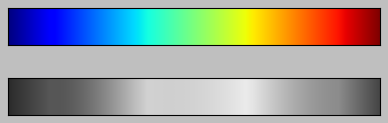

In [61]:
view_colormap('jet')

Observe las franjas brillantes en la imagen en escala de grises.
Incluso a todo color, este brillo desigual significa que la atención se centrará en ciertas partes de la gama de colores, lo que potencialmente enfatizará partes sin importancia del conjunto de datos.
Es mejor usar un mapa de colores como ``viridis`` (el predeterminado a partir de Matplotlib 2.0), que está construido específicamente para tener una variación de brillo uniforme en todo el rango.
Por lo tanto, no sólo juega bien con nuestra percepción del color, sino que también se traduce bien en la impresión en escala de grises:

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22616\3451835505.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22616\3451835505.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


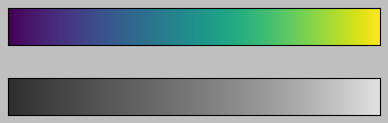

In [62]:
view_colormap('viridis')

Si prefiere los esquemas de arcoíris, otra buena opción para datos continuos es el mapa de colores ``cubehelix``:

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22616\3451835505.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22616\3451835505.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


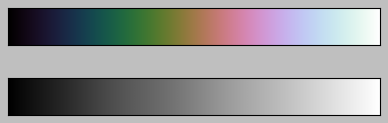

In [63]:
view_colormap('cubehelix')

Para otras situaciones, como mostrar desviaciones positivas y negativas de alguna media, pueden resultar útiles barras de colores de dos colores como ``RdBu`` (*Rojo-Azul*). Sin embargo, como puede ver en la siguiente figura, es importante tener en cuenta que la información positiva y negativa se perderá al traducir a escala de grises.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22616\3451835505.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22616\3451835505.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


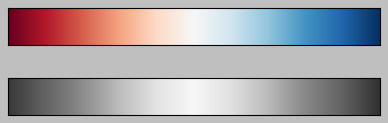

In [64]:
view_colormap('RdBu')

Veremos ejemplos del uso de algunos de estos mapas de colores a medida que avancemos.

Hay una gran cantidad de mapas de colores disponibles en Matplotlib; Para ver una lista de ellos, puede usar IPython para explorar el submódulo ``plt.cm``. Para obtener un enfoque más basado en principios sobre los colores en Python, puede consultar las herramientas y la documentación dentro de la biblioteca de Seaborn.

### Límites y extensiones de color

Matplotlib permite una amplia gama de personalización de la barra de colores.
**La barra de colores en sí es simplemente una instancia de ``plt.Axes``, por lo que todos los trucos de formato de ejes y ticks que hemos aprendido son aplicables.**
La barra de colores tiene una flexibilidad interesante: por ejemplo, podemos limitar los límites de color e indicar los valores fuera de los límites con una flecha triangular en la parte superior e inferior configurando la propiedad "extender".
Esto puede resultar útil, por ejemplo, si se muestra una imagen sujeta a ruido:

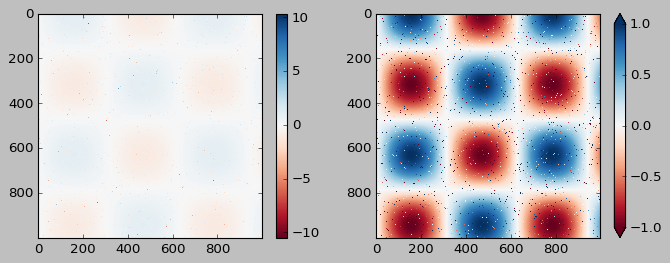

In [67]:
# Hacer ruido en el 1% de los píxeles de la imagen
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both') # Forma triangular en barra de color.
plt.clim(-1, 1); # Arreglar los bordes de color.

Observe que en el panel izquierdo, los límites de color predeterminados responden a los píxeles ruidosos, y el rango de ruido borra por completo el patrón que nos interesa.
En el panel derecho, configuramos manualmente los límites de color y agregamos extensiones para indicar valores que están por encima o por debajo de esos límites.
El resultado es una visualización mucho más útil de nuestros datos.

### Barras de colores discretas

Los mapas de colores son continuos por defecto, pero a veces le gustaría representar valores discretos.
La forma más sencilla de hacer esto es usar la función ``plt.cm.get_cmap()`` y pasar el nombre de un mapa de colores adecuado junto con el número de secciones/bins deseados:

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22616\2420005992.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))


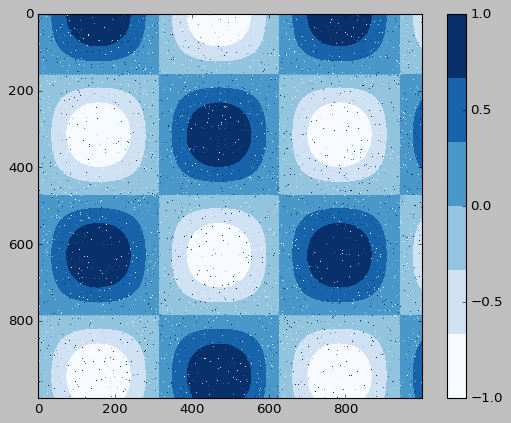

In [68]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

La versión discreta de un mapa de colores se puede utilizar como cualquier otro mapa de colores.

## Ejemplo: dígitos escritos a mano

Para ver un ejemplo de dónde esto podría resultar útil, veamos una visualización interesante de algunos datos de dígitos escritos a mano.
Estos datos están incluidos en Scikit-Learn y constan de casi 2000 imágenes pequeñas de $8 \times 8$ que muestran varios dígitos escritos a mano.

Por ahora, comencemos descargando los datos de los dígitos y visualizando varias de las imágenes de ejemplo con ``plt.imshow()``:

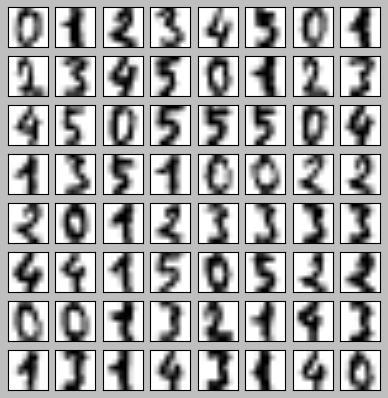

In [69]:
# Cargue imágenes de los dígitos del 0 al 5 y visualice varios de ellos.
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [70]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Debido a que cada dígito está definido por el tono de sus 64 píxeles, podemos considerar que cada dígito es un punto que se encuentra en un espacio de 64 dimensiones: cada dimensión representa el brillo de un píxel.
Pero visualizar relaciones en espacios de tan altas dimensiones puede resultar extremadamente difícil.
Una forma de abordar esto es utilizar una técnica de *reducción de dimensionalidad*, como el aprendizaje múltiple, para reducir la dimensionalidad de los datos manteniendo las relaciones de interés.
La reducción de dimensionalidad es un ejemplo de aprendizaje automático no supervisado y lo analizaremos con más detalle.

Aplazando la discusión de estos detalles, echemos un vistazo a una proyección de aprendizaje múltiple bidimensional de los datos de estos dígitos.

In [71]:
# Proyectar los dígitos en 2 dimensiones usando IsoMap.
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Usaremos nuestro mapa de colores discreto para ver los resultados, configurando los ``ticks`` y ``clim`` para mejorar la estética de la barra de colores resultante:

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22616\2899889086.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))


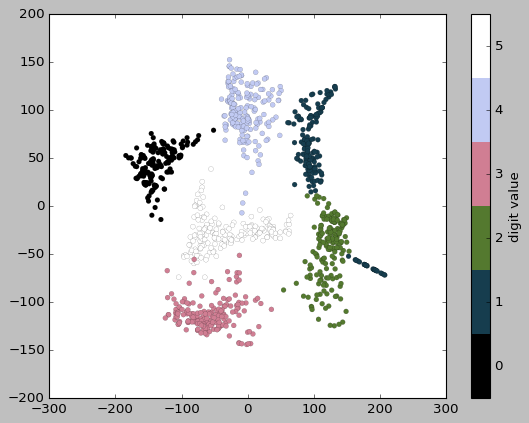

In [72]:
# Visualizar los resultados.
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

La proyección también nos brinda algunas ideas interesantes sobre las relaciones dentro del conjunto de datos: por ejemplo, los rangos de 5 y 3 casi se superponen en esta proyección, lo que indica que algunos cinco y tres escritos a mano son difíciles de distinguir y, por lo tanto, es más probable que se confundan mediante un algoritmo de clasificación automatizado.
Otros valores, como 0 y 1, están más separados y, por lo tanto, es mucho menos probable que se confundan.
Esta observación concuerda con nuestra intuición, porque 5 y 3 se parecen mucho más que 0 y 1.

Volveremos al aprendizaje múltiple y a la clasificación de dígitos.